In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import imutils

In [2]:
# Load the image
image_original = cv2.imread("1.jpg")  # Replace with the path to your image

1 First Values: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

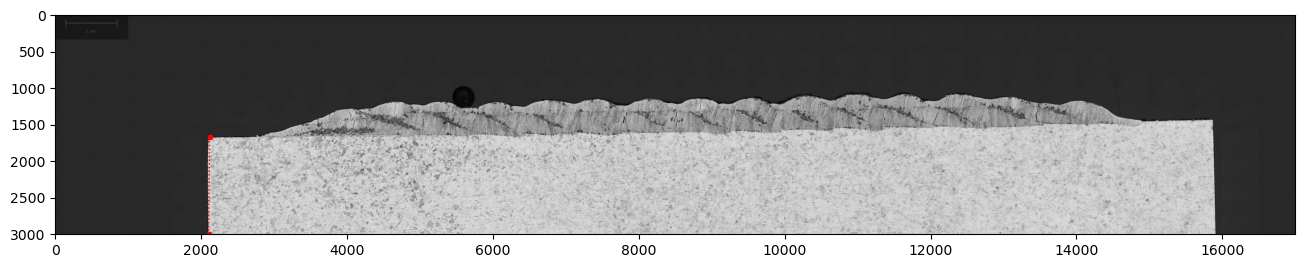

In [4]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2050, 2200
y_start, y_end = 1500, -1
threshold = 105

selected_portions= image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for y, row in enumerate(selected_portions):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 First Values:", first_values)

print("2 Coordinates:", coordinates)

num_first_values = len(first_values)
print("3 First Values Number Count:", num_first_values)

num_coordinates_count = len(coordinates)
print("4 Coordinates Number Count:", num_coordinates_count)

print("5 X Local Value:", first_values_x_local)

print("6 X Global Value:", first_values_x_global)

print("7 Y Global Value:", first_values_y_global)

print("8 Global Value:", global_coordinates)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')

2 Coordinates: [(50, 124), (41, 133), (66, 134), (69, 135), (71, 136), (72, 137), (72, 138), (72, 139), (72, 140), (72, 141), (72, 142), (72, 143), (73, 144), (73, 145), (73, 146), (73, 147), (73, 148), (73, 149), (73, 150), (73, 151), (73, 152), (73, 153), (73, 154), (73, 155), (73, 156), (73, 157), (73, 158), (73, 159), (73, 160), (73, 161), (73, 162), (73, 163), (73, 164), (73, 165), (73, 166), (73, 167), (73, 168), (73, 169), (74, 170), (74, 171), (74, 172), (74, 173), (74, 174), (74, 175), (74, 176), (74, 177), (74, 178), (74, 179), (74, 180), (74, 181), (74, 182), (74, 183), (74, 184), (74, 185), (74, 186), (74, 187), (74, 188), (74, 189), (74, 190), (74, 191), (74, 192), (74, 193), (74, 194), (74, 195), (74, 196), (75, 197), (75, 198), (75, 199), (75, 200), (75, 201), (75, 202), (75, 203), (75, 204), (75, 205), (75, 206), (75, 207), (75, 208), (75, 209), (75, 210), (75, 211), (75, 212), (75, 213), (75, 214), (75, 215), (75, 216), (75, 217), (75, 218), (75, 219), (75, 220), (75, 

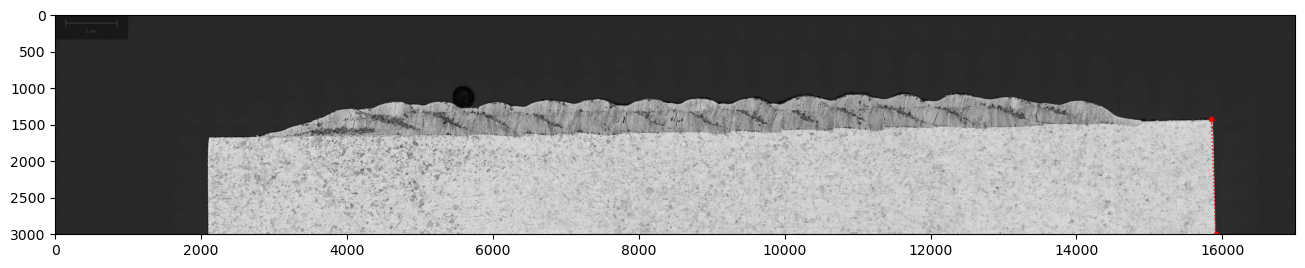

In [5]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 15800, 16000
y_start, y_end = 1300, -1
threshold = 105

selected_portions= image[y_start:y_end, x_start:x_end]
selected_coordinates = []
coordinates = []
first_values = []
coord = []

# Iterate through the image array in reverse order along the x-axis
for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]-1, -1, -1):  # Iterate in reverse order along the x-axis
        if selected_portions[y, x] > threshold and y > threshold:  # Check if both conditions are satisfied
            coordinates.append((x, y))
            selected_coordinates.append((x, y))  # Save the coordinates
            break  # Break the loop once the first instance is found

coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
#x_coordinates, y_coordinates = zip(*selected_coordinates)
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("2 Coordinates:", coordinates)
print("5 X Local Value:", first_values_x_local)
print("6 X Global Value:", first_values_x_global)
print("7 Y Global Value:", first_values_y_global)
print("8 Global Value:", global_coordinates)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')
